<a href="https://colab.research.google.com/github/AlejandroMllo/UAV-Human-Influence-Detection/blob/master/PrimitiveShapesExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import cmath
import math

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import normalize

%matplotlib inline

In [0]:
def laguerre_gauss_filter(side_size, w):
  """
  Computes and returns a matrix containing the Laguerre-Gauss filter.
  """
  
  scale = (1.j * math.pow(math.pi, 2) * math.pow(w, 4))
  # Not sure if `scale` is the appropriate name
  power_scale = -math.pow(math.pi, 2) * math.pow(w, 2)
  # Not sure if `power_scale` is the appropriate name
  
  filter = np.zeros((side_size, side_size), dtype=complex)
  
  for x in range(side_size):
    x_squared = math.pow(x, 2)
    for y in range(side_size):
      power = cmath.exp(power_scale * (x_squared + math.pow(y, 2)))
      
      filter[x, y] = scale * complex(x, y) * power
    # print('Coord:', x, y, scale * complex(x, y) * power)
      
  return filter

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
shapes_dataset_path = 'drive/My Drive/PI 1/Datasets/shapes'

triangles_path = shapes_dataset_path + '/triangles/'
squares_path = shapes_dataset_path + '/squares/'
circles_path = shapes_dataset_path + '/circles/'

# -- Find files

def find_files(path):
  
  files = next(os.walk(path))[2]
  return np.array(sorted(
            files, key=lambda f: int("".join(list(filter(str.isdigit, f))))
         ))

triangles = find_files(triangles_path)
squares = find_files(squares_path)
circles = find_files(circles_path)

In [0]:
print('Tr:', len(triangles))
print('Sq:', len(squares))
print('Cr:', len(circles))

Tr: 100
Sq: 100
Cr: 100


In [0]:
num_samples = 2

sample_triangles = np.random.choice(triangles, num_samples)
sample_squares = np.random.choice(squares, num_samples)
sample_circles = np.random.choice(circles, num_samples)

# -- Load images
def load_images(image_names, path):
  
  images = []
  
  for name in image_names:
    img_path = path + name
    images.append(mpimg.imread(img_path))
    
  return images

sample_triangles = load_images(sample_triangles, triangles_path)
sample_squares = load_images(sample_squares, squares_path)
sample_circles = load_images(sample_circles, circles_path)

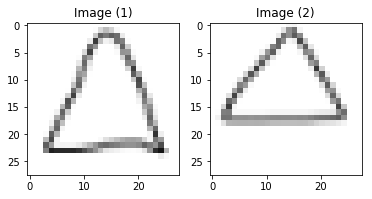

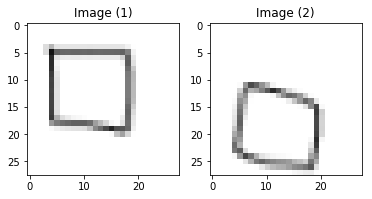

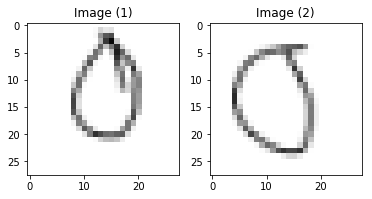

In [0]:
# Taken from: https://gist.github.com/soply/f3eec2e79c165e39c9d540e916142ae1

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
show_images(sample_triangles, cols=1)
show_images(sample_squares, cols=1)
show_images(sample_circles, cols=1)

In [0]:
def show_plots(plots, cols = 1, titles = None):
    """Display a list of plots in a single figure with matplotlib.
    
    Parameters
    ---------
    plots: List of np.arrays compatible with plt.plot.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(plots) == len(titles)))
    n_plots = len(plots)
    if titles is None: titles = ['Plot (%d)' % i for i in range(1,n_plots + 1)]
    fig = plt.figure()
    for n, (plot, title) in enumerate(zip(plots, titles)):
        a = fig.add_subplot(cols, np.ceil(n_plots/float(cols)), n + 1)
        if plot.ndim == 2:
            plt.gray()
        plt.plot(plot)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_plots)
    plt.show()
    
def show_scatter_plots(plots, cols = 1, titles = None):
    """Display a list of plots in a single figure with matplotlib.
    
    Parameters
    ---------
    plots: List of np.arrays compatible with plt.plot.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(plots) == len(titles)))
    n_plots = len(plots)
    if titles is None: titles = ['Plot (%d)' % i for i in range(1,n_plots + 1)]
    fig = plt.figure()
    for n, (plot, title) in enumerate(zip(plots, titles)):
        a = fig.add_subplot(cols, np.ceil(n_plots/float(cols)), n + 1)
        if plot.ndim == 2:
            plt.gray()
        plt.scatter(np.arange(len(plot)), plot)
        a.set_title(title)
    #fig.set_size_inches(np.array(fig.get_size_inches()) * n_plots)
    plt.show()

In [0]:
lg_filter_28 = laguerre_gauss_filter(28, 0.9)

In [0]:
def rgb2grayscale(rgb_img):
  
  if rgb_img.ndim != 3:
    # print('returning non rgb image')
    return rgb_img
  
  img = np.zeros(rgb_img.shape)
  img[:, :, 0] = rgb_img[:, :, 0] * 0.2125 # RED
  img[:, :, 1] = rgb_img[:, :, 1] * 0.7154 # GREEN
  img[:, :, 2] = rgb_img[:, :, 2] * 0.0721 # BLUE

  return np.sum(img, axis=2)

(28, 28)

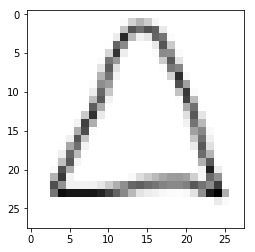

In [0]:
tri = rgb2grayscale(sample_triangles[0])
plt.imshow(tri, cmap='gray')
tri.shape

In [0]:
ft_lg_28 = np.fft.fft2(lg_filter_28)
ft_tr0 = np.fft.fft2(tri)

In [0]:
convolution = np.multiply(ft_lg_28, ft_tr0)

In [0]:
shifted_conv = np.fft.fftshift(convolution)

x_line_profile = shifted_conv[27//2, :]

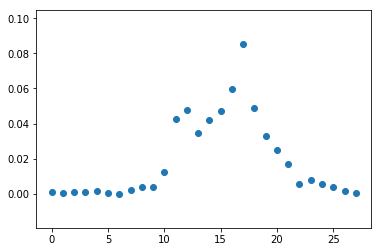

In [0]:
vectorized_phase = np.vectorize(cmath.phase)
vectorized_amplitude = np.vectorize(np.abs)

plt.scatter(np.arange(28), vectorized_amplitude(x_line_profile))

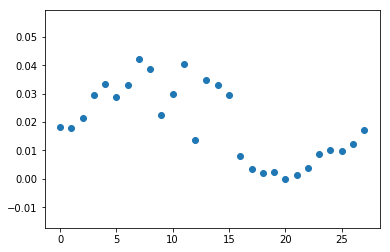

In [0]:
y_line_profile = shifted_conv[:,27//2]

plt.scatter(np.arange(28), vectorized_amplitude(y_line_profile))

### Double Fourier Transform

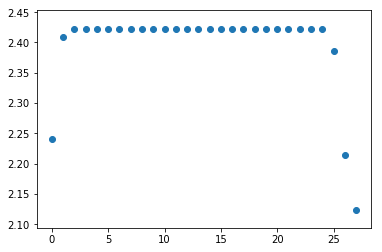

In [0]:
ft_conv = np.fft.fft2(convolution)

sh = np.fft.fftshift(ft_conv)

x_line_profile_dft = sh[27//2, :]

plt.scatter(np.arange(28), vectorized_amplitude(x_line_profile_dft))

## Pipeline

In [0]:
def kernel_transform(batch, kernel=np.fft.fft2):
  
  transformed_batch = []
  
  for instance in batch:
    
    instance = rgb2grayscale(instance)
    transformed = kernel(instance)
    transformed_batch.append(transformed)
    
  return np.array(transformed_batch)

transformed_triangles = kernel_transform(sample_triangles)
transformed_squares = kernel_transform(sample_squares)
transformed_circles = kernel_transform(sample_circles)

In [0]:
def convolve(transformed_kernel, batch):
  
  convolved_batch = []
  
  for instance in batch:
    conv = np.multiply(transformed_kernel, instance)
    convolved_batch.append(conv)
    
  return np.array(convolved_batch)

def shift(batch):
  
  shifted_batch = []
  
  for instance in batch:
    shifted = np.fft.fftshift(instance)
    shifted_batch.append(shifted)
    
  return np.array(shifted_batch)

In [0]:
convolved_triangles = convolve(ft_lg_28, transformed_triangles)
shifted_triangles = shift(convolved_triangles)

In [0]:
shifted_triangles.shape

(2, 28, 28)

In [0]:
def line_profile(batch, axis=1):
  # Axis 0: y axis
  # Axis 1: x axis
  # Equivalent axes definition to numpy.
  
  line_profiles = []
  
  num_instances = batch.shape[0]
  
  for i in range(num_instances):
   
    instance = batch[i]
    axis_length = instance.shape[1 - axis] - 1
    
    if axis == 0:
      line_profiles.append(instance[:,axis_length//2])
    else:
      line_profiles.append(instance[axis_length//2,:])
      
  return np.array(line_profiles)
    

In [0]:
x_profiles_triangles = line_profile(shifted_triangles, axis=1)

In [0]:
average_x_profile_triangles = np.mean(x_profiles_triangles, axis=0)

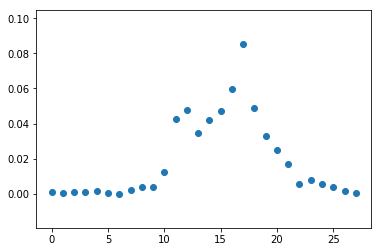

In [0]:
plt.scatter(np.arange(28), np.abs(x_profiles_triangles[0]))

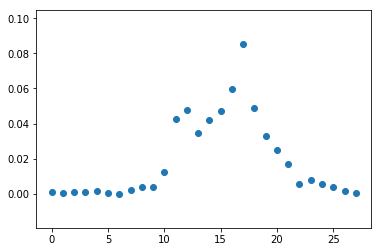

In [0]:
plt.scatter(np.arange(28), np.abs(x_profiles_triangles[0]))

In [0]:
def inv_transform(batch, kernel=np.fft.ifft2):
  
  transformed_batch = []
  
  for instance in batch:
    
    transformed = kernel(instance)
    transformed_batch.append(transformed)
    
  return np.array(transformed_batch)

In [0]:
def threshold_image(px):
  
   return 1.0 if np.abs(px) > 0.001 else 0.0

keep_edges = np.vectorize(threshold_image)

In [0]:
def ft_pipeline(transformed_filter, sample):
  
  transformed = kernel_transform(sample)
  convolved = convolve(transformed_filter, transformed)
  # inv_conv = inv_transform(convolved)
  #thresholded = keep_edges(vectorized_amplitude(inv_conv))
  shifted = shift(convolved)
  x_profile = line_profile(shifted, axis=1)
  y_profile = line_profile(shifted, axis=0)
  
  return x_profile, y_profile

### Triangles

In [0]:
x_profile_triangles, y_profile_triangles = ft_pipeline(ft_lg_28, sample_triangles)

x_profile_triangles.shape

(2, 28)

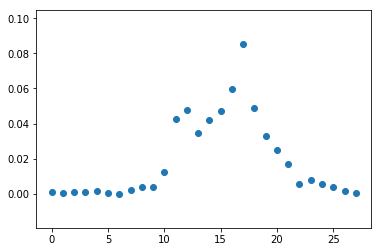

In [0]:
plt.scatter(np.arange(28), vectorized_amplitude(x_profile_triangles[0]))

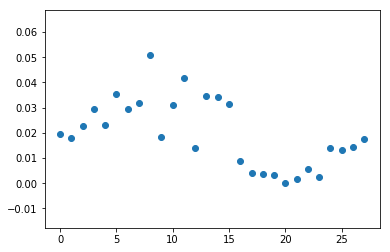

In [0]:
plt.scatter(np.arange(28), vectorized_amplitude(y_profile_triangles[0]))

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


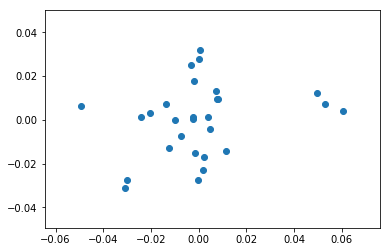

In [0]:
plt.scatter(x_profile_triangles[0], y_profile_triangles[0])

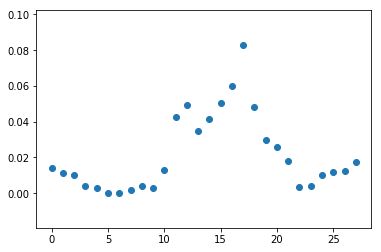

In [0]:
triangles_amplitude = vectorized_amplitude(x_profile_triangles)

plt.scatter(np.arange(28), triangles_amplitude[0])

### Circles

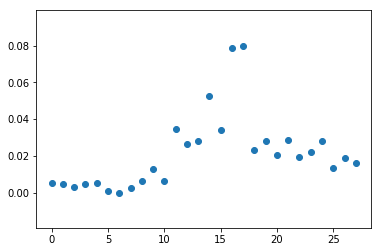

In [0]:
x_profile_circles, y_profile_circles = ft_pipeline(ft_lg_28, sample_circles)

plt.scatter(np.arange(28), vectorized_amplitude(x_profile_circles[0]))

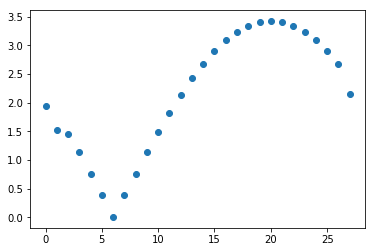

In [0]:
circles_amplitude = vectorized_amplitude(x_profile_circles)

plt.scatter(np.arange(28), circles_amplitude[0])

### Squares

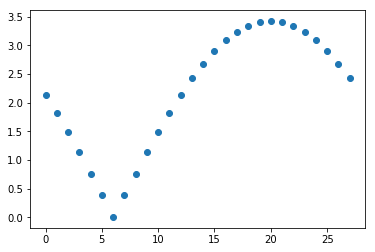

In [0]:
x_profile_squares, y_profile_squares = ft_pipeline(ft_lg_28, sample_squares)

plt.scatter(np.arange(28), vectorized_amplitude(x_profile_squares[0]))

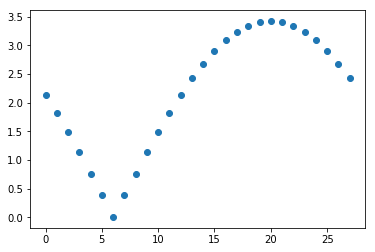

In [0]:
squares_amplitude = vectorized_amplitude(x_profile_squares)

plt.scatter(np.arange(28), squares_amplitude[0])

#### SHAPES LINE PROFILE COMPARISON

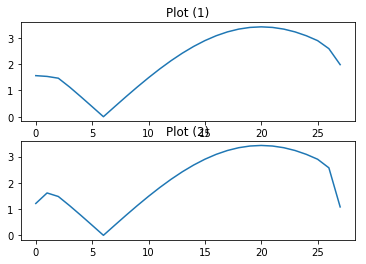

In [0]:
show_plots(triangles_amplitude, 2)

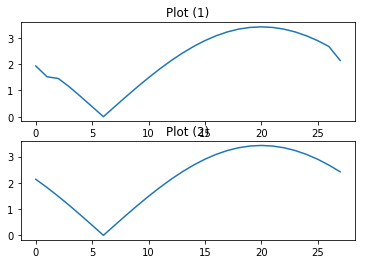

In [0]:
show_plots(circles_amplitude, 2)

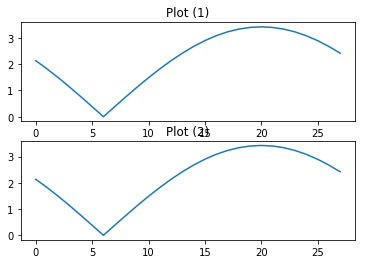

In [0]:
show_plots(squares_amplitude, 2)

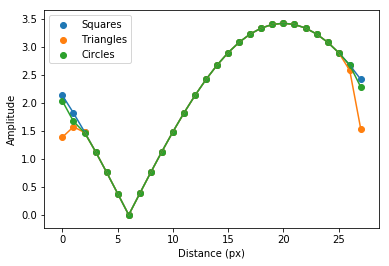

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


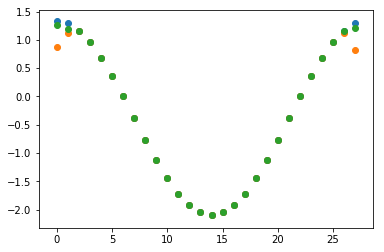

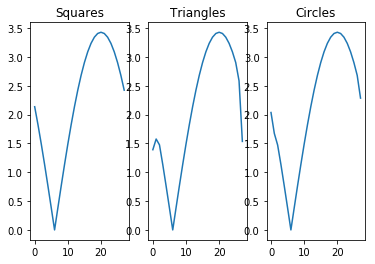

In [0]:
avg_sq_amp = np.mean(squares_amplitude, axis=0)
avg_tr_amp = np.mean(triangles_amplitude, axis=0)
avg_ci_amp = np.mean(circles_amplitude, axis=0)

avg_amps = [avg_sq_amp, avg_tr_amp, avg_ci_amp]

names = ['Squares', 'Triangles', 'Circles']

i = 0
for a in avg_amps:
  plt.scatter(np.arange(len(a)), a, label=names[i])
  plt.plot(a)
  i += 1
plt.ylabel('Amplitude')
plt.xlabel('Distance (px)')
plt.legend()
#plt.savefig('shapes_line_profile_comparison', quality=90, format='pdf')
plt.show()

avg_sq_xpr = np.mean(x_profile_squares, axis=0)
avg_tr_xpr = np.mean(x_profile_triangles, axis=0)
avg_ci_xpr = np.mean(x_profile_circles, axis=0)
avg_xpr = [avg_sq_xpr, avg_tr_xpr, avg_ci_xpr]

for a in avg_xpr:
  plt.scatter(np.arange(len(a)), a)
plt.show()

show_plots(avg_amps, cols=1, titles=names)

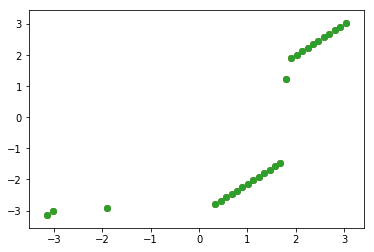

In [0]:
def scatter_func(batch):

  return vectorized_phase(batch)

plt.scatter(scatter_func(x_profile_circles[0]), scatter_func(y_profile_circles[0]))
plt.scatter(scatter_func(x_profile_squares[0]), scatter_func(y_profile_squares[0]))
plt.scatter(scatter_func(x_profile_triangles[0]), scatter_func(y_profile_triangles[0]))

plt.show()

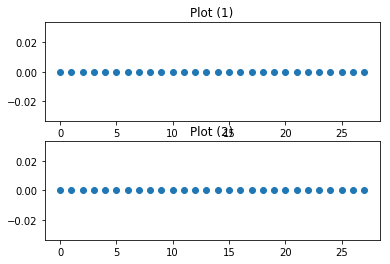

In [0]:
show_scatter_plots(scatter_func(x_profile_circles)[0:4], 2)

# CLASSIFIER

In [0]:
from sklearn.model_selection import train_test_split

#fold_generator = KFold(n_splits=10, shuffle=True, random_state=420)

triangle_images = load_images(triangles, triangles_path)
square_images = load_images(squares, squares_path)
circle_images = load_images(circles, circles_path)

classes = [0, 1, 2] # 0=triangles; 1=squares; 2=circles
images = np.array([triangle_images, square_images, circle_images]).reshape((-1, 28, 28, 3))
labels = np.array( ([0]*len(triangle_images)) + ([1]*len(square_images)) + ([2]*len(circle_images)) )

# Extract features from images
x_profiles, _ = ft_pipeline(ft_lg_28, images)

x_profiles = vectorized_amplitude(x_profiles)


gray_images = []
for img in images:
  gray_images.append(rgb2grayscale(img).reshape(-1))

gray_images = np.array(gray_images)

train_x, val_x, train_y, val_y = \
  train_test_split(gray_images, labels, test_size=0.6, random_state=420)

val_x, test_x, val_y, test_y = \
  train_test_split(val_x, val_y, test_size=0.5, random_state=0)

# Split datasets
train_features, val_features, train_labels, val_labels = \
  train_test_split(x_profiles, labels, test_size=0.6, random_state=420)

validation_features, test_features, validation_labels, test_labels = \
  train_test_split(val_features, val_labels, test_size=0.5, random_state=0)

In [0]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(train_features, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
classifier.score(validation_features, validation_labels)

0.3888888888888889

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(hidden_layer_sizes=28, alpha=1, max_iter=100),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]



for i in range(len(classifiers)):
  clf = classifiers[i]
  clf.fit(train_features, train_labels)

  if i == 0:
    best = clf

  score = clf.score(validation_features, validation_labels)

  print(names[i], ' SCORE =', score)

Nearest Neighbors  SCORE = 0.3888888888888889
Linear SVM  SCORE = 0.3888888888888889
RBF SVM  SCORE = 0.3888888888888889
Gaussian Process  SCORE = 0.3888888888888889
Decision Tree  SCORE = 0.3888888888888889
Random Forest  SCORE = 0.25555555555555554
Neural Net  SCORE = 0.3888888888888889
AdaBoost  SCORE = 0.3888888888888889
Naive Bayes  SCORE = 0.3888888888888889
QDA  SCORE = 0.3888888888888889


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:434: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:436: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:717: RuntimeWarning: inva

In [0]:
clf = KNeighborsClassifier(3)
clf.fit(train_x, train_y)

clf.score(val_x, val_y)

0.5111111111111111

In [0]:
best.score(validation_features, validation_labels)

0.3888888888888889

In [0]:
from sklearn.metrics import confusion_matrix

preds = best.predict(validation_features)

confusion_matrix(validation_labels, preds)

array([[35,  0,  0],
       [23,  0,  0],
       [32,  0,  0]])

In [0]:
len(train_features)

120

# TEST PREPROCESSING

In [0]:
support_images_path = 'drive/My Drive/PI 1/Support Images/'

aerial_images = \
  load_images(['aerial_negative_0.jpeg', 'aerial_negative_1.jpeg', \
               'aerial_positive_0.jpeg', 'aerial_positive_1.jpeg'], support_images_path)

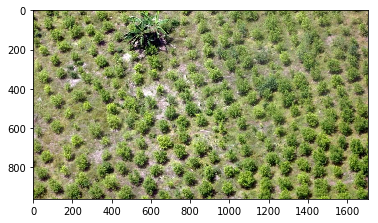

In [0]:
plt.imshow(aerial_images[0])

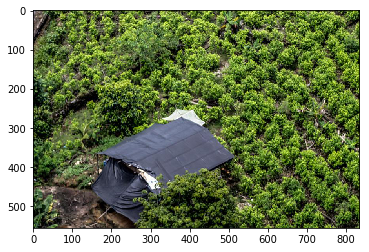

In [0]:
plt.imshow(aerial_images[2])

### Preprocessing

In [0]:
lg_filter_556 = laguerre_gauss_filter(556, 0.99)

In [0]:
ft_lg_filter_556 = np.fft.fft2(lg_filter_556)

In [0]:
aerial_negative = aerial_images[1]
aerial_positive = aerial_images[3]

ft_negative = np.fft.fft2(rgb2grayscale(aerial_negative))
ft_positive = np.fft.fft2(rgb2grayscale(aerial_positive))

aerial_neg_filtered = np.fft.ifft2(np.multiply(ft_lg_filter_556, ft_negative))
aerial_pos_filtered = np.fft.ifft2(np.multiply(ft_lg_filter_556, ft_positive))

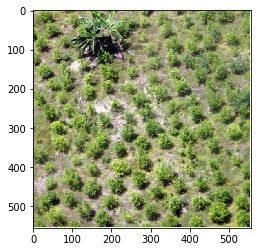

In [0]:
plt.imshow(aerial_negative)

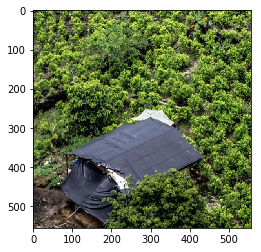

In [0]:
plt.imshow(aerial_positive)

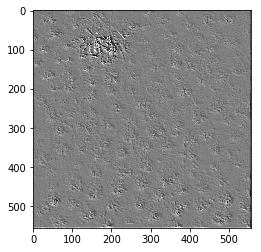

In [0]:
plt.imshow(vectorized_phase(aerial_neg_filtered), cmap='gray')

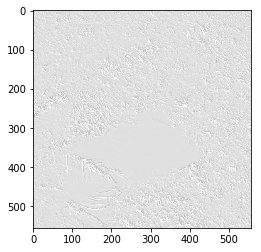

In [0]:
plt.imshow(vectorized_phase(aerial_pos_filtered), cmap='gray')

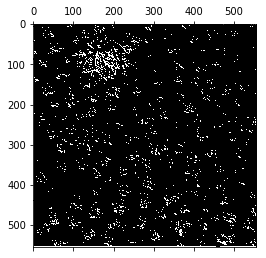

In [0]:
thresholded_neg = keep_edges(vectorized_phase(aerial_neg_filtered))

plt.matshow(thresholded_neg, cmap='gray')

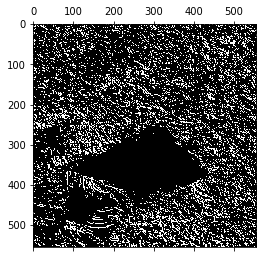

In [0]:
thresholded_pos = keep_edges(vectorized_phase(aerial_pos_filtered))

plt.matshow(thresholded_pos, cmap='gray')

In [0]:
def slide_window_average(matrix):
  
  width, height = matrix.shape
  
  window_side = 16
  
  for i in range(0, width - window_side + 1, window_side//2):
    for j in range(0, height - window_side + 1, window_side//2):
      
      submatrix = matrix[i:i+window_side, j:j+window_side]
      
      matrix[i:i+window_side, j:j+window_side] = np.mean(submatrix)
      
  return matrix

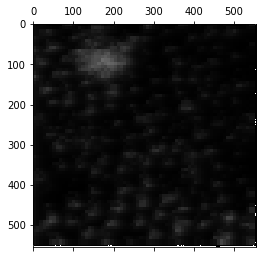

In [0]:
sl_neg = slide_window_average(thresholded_neg)

plt.matshow(sl_neg, cmap='gray')

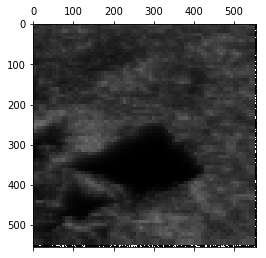

In [0]:
sl_pos = slide_window_average(thresholded_pos)

plt.matshow(sl_pos, cmap='gray')

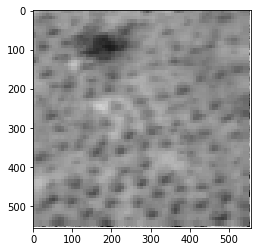

In [0]:
s = slide_window_average(rgb2grayscale(aerial_negative))

plt.imshow(s, cmap='gray')

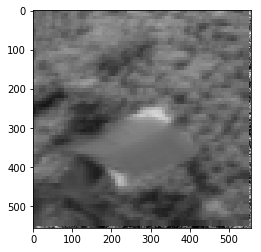

In [0]:
s2 = slide_window_average(rgb2grayscale(aerial_positive))

plt.imshow(s2, cmap='gray')

In [0]:
x_profile_aerial, y_profile_aerial = ft_pipeline(ft_lg_filter_556, [aerial_negative, aerial_positive])

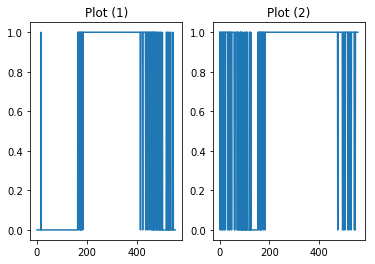

In [0]:
show_plots(vectorized_amplitude(x_profile_aerial))

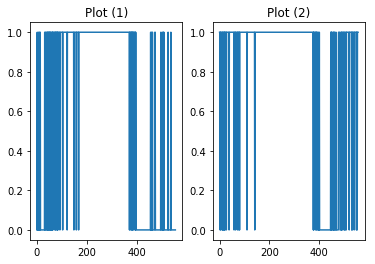

In [0]:
show_plots(vectorized_amplitude(y_profile_aerial))

In [0]:
x_profile_aerial_thresholded, y_profile_aerial_thresholded = ft_pipeline(ft_lg_filter_556, [sl_neg, sl_pos])

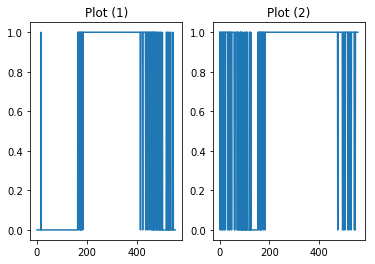

In [0]:
show_plots(vectorized_amplitude(x_profile_aerial))

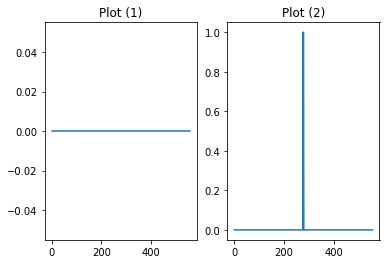

In [0]:
show_plots(vectorized_amplitude(y_profile_aerial_thresholded))

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


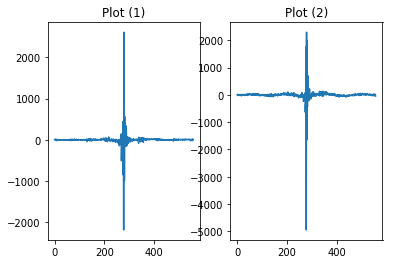

In [0]:
sl_neg_fft = np.fft.fft2(sl_neg)
sl_pos_fft = np.fft.fft2(sl_pos)

sh_neg = np.fft.fftshift(sl_neg_fft)
sh_pos = np.fft.fftshift(sl_pos_fft)

xlp = line_profile(np.array([sh_neg, sh_pos]))
#print(xlp.reshape(-1).shape)
#plt.plot(np.arange(556), vectorized_amplitude(xlp.reshape(-1)))
#plt.show()
show_plots(xlp)

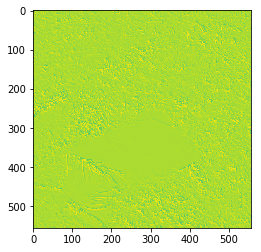

In [0]:
pos = vectorized_phase(aerial_pos_filtered)
neg = vectorized_phase(aerial_neg_filtered)

plt.imshow(pos)

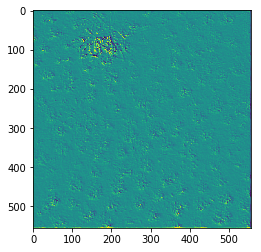

In [0]:
plt.imshow(neg)

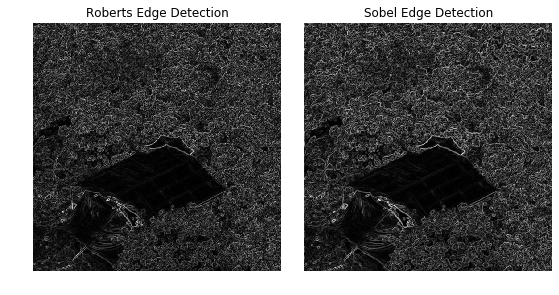

In [0]:
from skimage.data import camera
from skimage.filters import roberts, sobel

import copy

image = rgb2grayscale(copy.deepcopy(vectorized_amplitude(rgb2grayscale(aerial_pos_filtered))))
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

## MNIST

In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_pr_train, y_pr_train = ft_pipeline(ft_lg_28, x_train)
x_pr_test, y_pr_test = ft_pipeline(ft_lg_28, x_test)

x_train = np.concatenate((x_pr_train, y_pr_train), axis=1)
x_test = np.concatenate((x_pr_test, y_pr_test), axis=1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


KeyboardInterrupt: ignored

In [0]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=56, name='my1'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu', name='my2'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', name='my3'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', name='my4'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

epochs = 12
batch_size = 128

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss (x_profiles):', score[0])
print('Test accuracy (x_profiles):', score[1])

## CIFAR 10

In [0]:
lg_filter_32 = laguerre_gauss_filter(32, 0.9)
ft_lg_32 = np.fft.fft2(lg_filter_32)

In [0]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

batch_size = 32
num_classes = 10
epochs = 100
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train_org, y_train_org), (x_test_org, y_test_org) = cifar10.load_data()

In [0]:
def ft_pipeline(transformed_filter, sample):
  
  transformed = kernel_transform(sample)
  convolved = convolve(transformed_filter, transformed)
  inv_conv = inv_transform(convolved)
  # thresholded = keep_edges(vectorized_amplitude(inv_conv))

  transformed = kernel_transform(inv_conv)
  convolved = convolve(transformed_filter, transformed)
  # inv_conv = inv_transform(convolved)

  shifted = shift(convolved)
  x_profile = line_profile(shifted, axis=1)
  y_profile = line_profile(shifted, axis=0)
  
  return x_profile, y_profile

In [0]:
x_pr_train, y_pr_train = ft_pipeline(ft_lg_32, x_train_org)
x_pr_test, y_pr_test = ft_pipeline(ft_lg_32, x_test_org)

x_train = vectorized_amplitude(np.concatenate((x_pr_train, y_pr_train), axis=1))
x_test = vectorized_amplitude(np.concatenate((x_pr_test, y_pr_test), axis=1))

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train_org, num_classes)
y_test = keras.utils.to_categorical(y_test_org, num_classes)

x_train shape: (50000, 64)
50000 train samples
10000 test samples


In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(1)
clf.fit(x_train, y_train)

score = clf.score(x_test, y_test)

print('KNN score =', score)

KNN score = 0.2222


In [0]:
classes_idx = {}

for i in range(len(y_train)):

  class_ = np.argmax(y_train[i])

  if class_ not in classes_idx:
    classes_idx[class_] = i
    print(np.argmax(y_train[i]))

  if len(classes_idx) == 10:
    break

print(classes_idx)

6
9
4
1
2
7
8
3
5
0
{6: 0, 9: 1, 4: 3, 1: 4, 2: 6, 7: 7, 8: 8, 3: 9, 5: 27, 0: 29}


In [0]:
classes_idx2 = {}

for i in range(1000, len(y_train)):

  class_ = np.argmax(y_train[i])

  if class_ not in classes_idx2:
    classes_idx2[class_] = i
    print(np.argmax(y_train[i]))

  if len(classes_idx2) == 10:
    break

print(classes_idx2)

9
4
3
2
1
8
0
6
5
7
{9: 1000, 4: 1001, 3: 1002, 2: 1003, 1: 1006, 8: 1011, 0: 1012, 6: 1013, 5: 1015, 7: 1019}


In [0]:
def preprocess(transformed_filter, sample):
  
  transformed = kernel_transform(sample)
  convolved = convolve(transformed_filter, transformed)
  inv_conv = inv_transform(convolved)

  transformed = kernel_transform(inv_conv)
  convolved = convolve(transformed_filter, transformed)
  inv_conv = inv_transform(convolved)

  #thresholded = keep_edges(vectorized_amplitude(inv_conv))
  #shifted = inv_conv #shift(inv_conv)
  #x_profile = line_profile(shifted, axis=1)
  #y_profile = line_profile(shifted, axis=0)
  
  #return x_profile, y_profile

  return vectorized_phase(inv_conv[0])

In [0]:
from skimage.data import camera
from skimage.filters import roberts, sobel

import copy

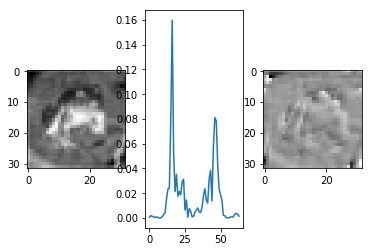

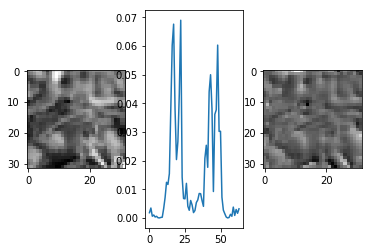

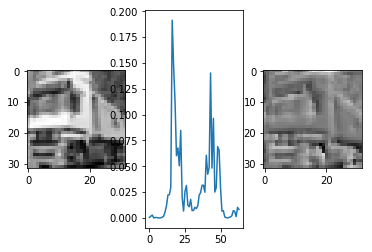

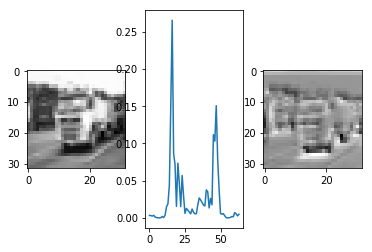

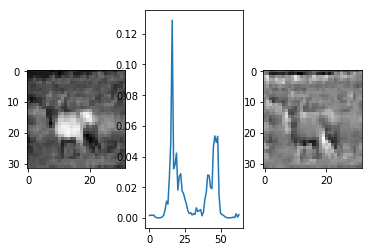

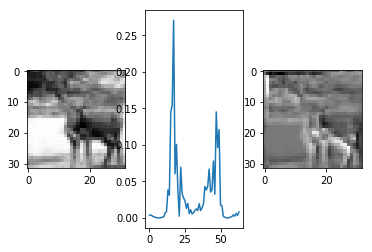

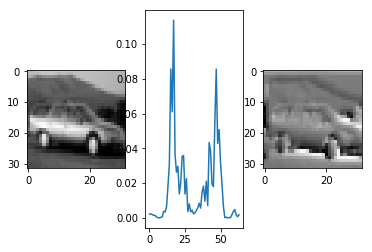

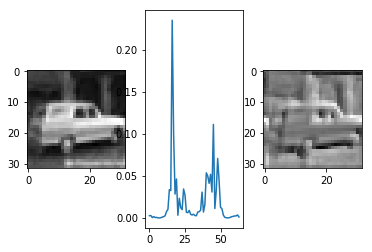

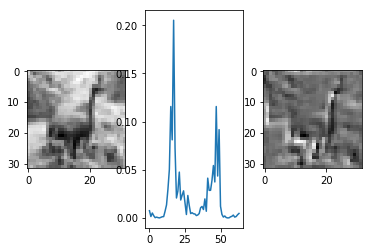

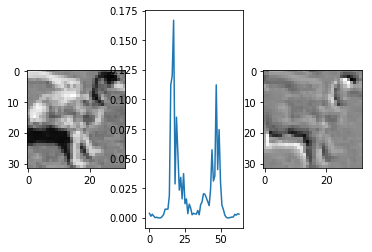

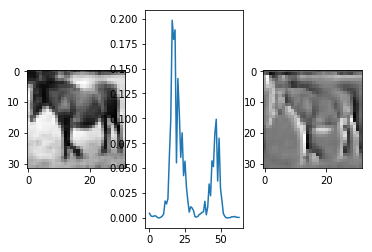

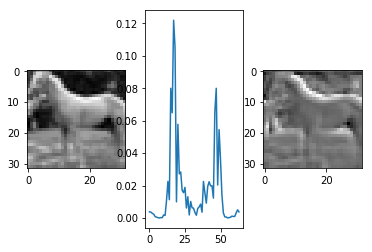

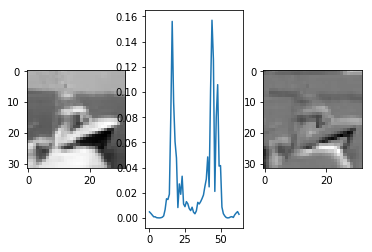

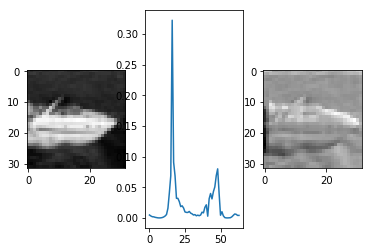

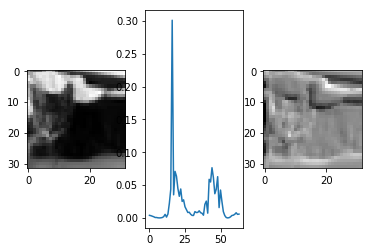

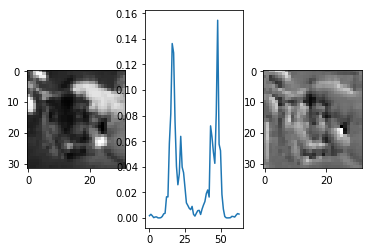

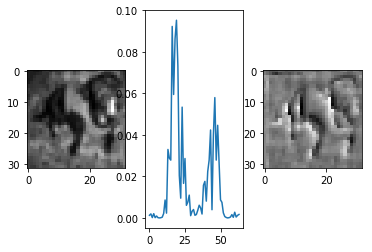

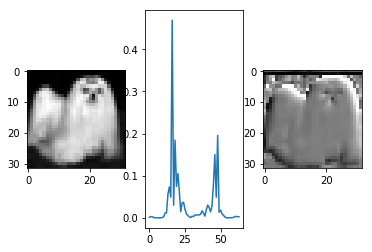

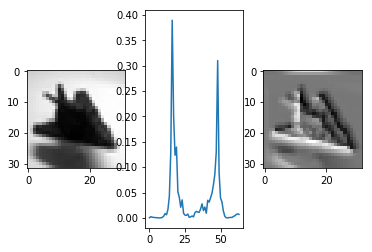

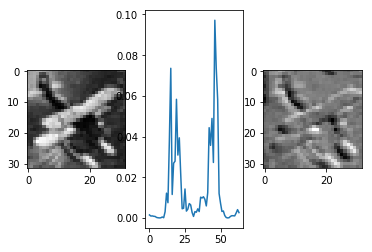

In [0]:
for k in classes_idx:

  idx1 = classes_idx[k]
  idx2 = classes_idx2[k]

  im1 = x_train_org[idx1]
  im2 = x_train_org[idx2]

  im1 = preprocess(ft_lg_32, [im1])
  im2 = preprocess(ft_lg_32, [im2])

  im1_rob = roberts(im1)
  im1_sob = sobel(im1)

  plt.subplot(1, 3, 1)
  plt.imshow(rgb2grayscale(x_train_org[idx1]), cmap='gray')
  plt.subplot(1, 3, 2)
  plt.plot(np.arange(64), x_train[idx1])
  plt.subplot(1, 3, 3)
  plt.imshow(im1, cmap='gray')
  plt.show()
  plt.subplot(1, 3, 1)
  plt.imshow(rgb2grayscale(x_train_org[idx2]), cmap='gray')
  plt.subplot(1, 3, 2)
  plt.plot(np.arange(64), x_train[idx2])
  plt.subplot(1, 3, 3)
  plt.imshow(im2, cmap='gray')
  plt.show()

In [0]:
def threshold_image2(px):
  
   return 1.0 if np.abs(px) > 2.3 else 0.0

thr = np.vectorize(threshold_image2)

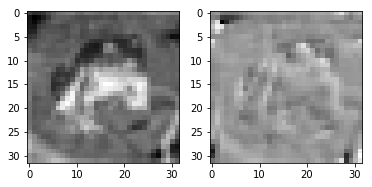

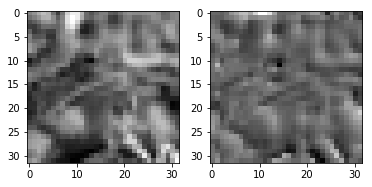

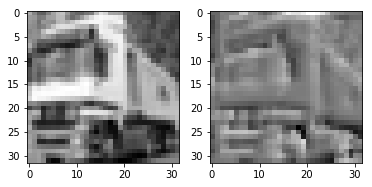

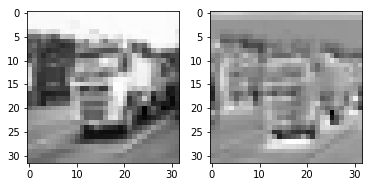

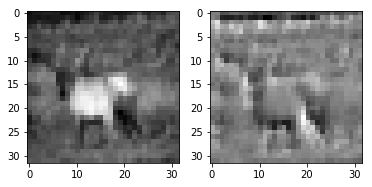

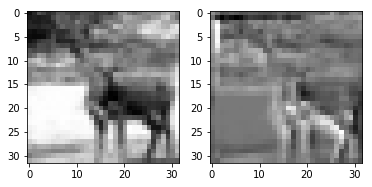

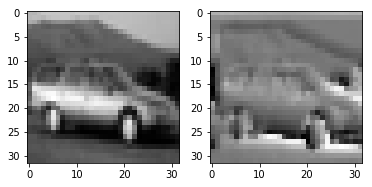

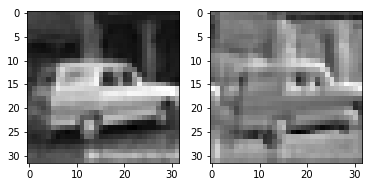

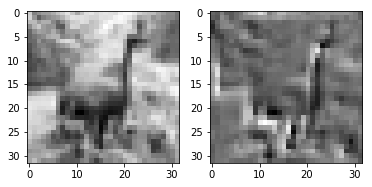

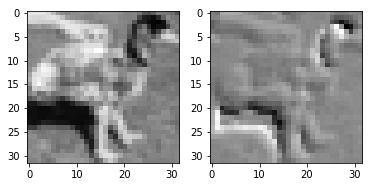

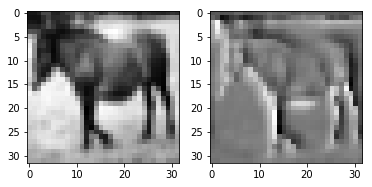

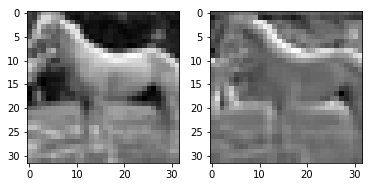

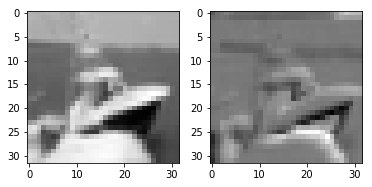

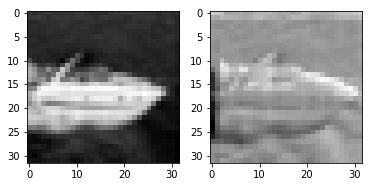

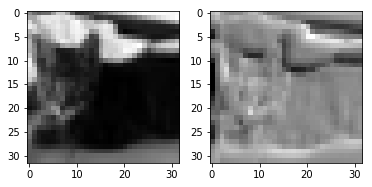

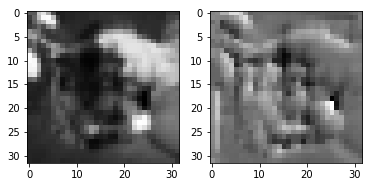

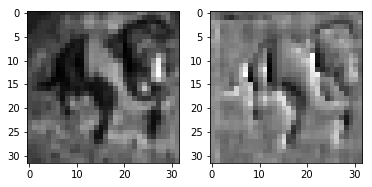

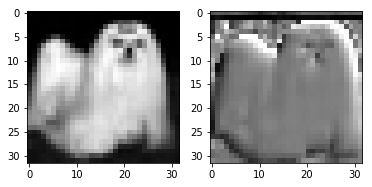

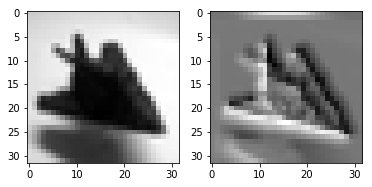

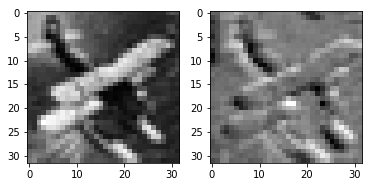

In [0]:
for k in classes_idx:

  idx1 = classes_idx[k]
  idx2 = classes_idx2[k]

  im1 = x_train_org[idx1]
  im2 = x_train_org[idx2]

  im1 = preprocess(ft_lg_32, [im1])
  im2 = preprocess(ft_lg_32, [im2])

  plt.subplot(1, 2, 1)
  plt.imshow(rgb2grayscale(x_train_org[idx1]), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(im1, cmap='gray')
  plt.show()
  plt.subplot(1, 2, 1)
  plt.imshow(rgb2grayscale(x_train_org[idx2]), cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(im2, cmap='gray')
  plt.show()

In [0]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=64, name='my1'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu', name='my2'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', name='my3'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu', name='my4'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu', name='my5'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu', name='my6'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', name='my7'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu', name='my8'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu', name='my9'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax', name='output_layer'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#x_train /= 255
#x_test /= 255

cut = 500

model.fit(x_train[:cut], y_train[:cut],
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: ComplexWarning: Casting complex values to real discards the imaginary part


Train on 500 samples, validate on 10000 samples
Epoch 1/100
500/500 [==============================] - 4s 8ms/step - loss: 2.3017 - acc: 0.1140 - val_loss: 2.2997 - val_acc: 0.0999
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 2.2913 - acc: 0.1080 - val_loss: 2.2989 - val_acc: 0.1013
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 2.2911 - acc: 0.1240 - val_loss: 2.2984 - val_acc: 0.1001
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 2.2844 - acc: 0.1260 - val_loss: 2.2971 - val_acc: 0.0968
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 2.2956 - acc: 0.1180 - val_loss: 2.2967 - val_acc: 0.0996
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 2.2946 - acc: 0.1040 - val_loss: 2.2965 - val_acc: 0.1015
Epoch 7/100
500/500 [==============================] - 3s 5ms/step - loss: 2.2852 - acc: 0.1100 - val_loss: 2.2966 - val_acc: 0.1026
Epoch 8/100
500/500 [

KeyboardInterrupt: ignored